OBS: EXECUTAR ESTE NOTEBOOK NO GOOGLE COLAB PARA EVITAR PROBLEMAS COM AS CONFIGURAÇÕES DO AMBIENTE DE EXECUÇÃO

Instalando bibliotecas

In [1]:
!pip install pycaret[full]
!pip install pyarrow

Importando bibliotecas

In [2]:
import pandas as pd
from pycaret.time_series import *

Importano base de dados

In [8]:
df = pd.read_parquet(r'df_consolidado_diario.parquet')
df.reset_index(drop = False, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head(3)

,period,bx_gse,by_gse,bz_gse,bt,density,speed,temperature,source,gse_x_satellite,gse_y_satellite,gse_z_satellite,smoothed_ssn,dst
date,,,,,,,,,,,,,,
1998-02-16,train_a,-5.55,3.00,1.25,6.800000,1.53,383.920013,110237.0,ac,1522376.9,143704.6,149496.7,65.400002,-7.0
1998-02-17,train_a,-5.69,0.87,0.95,6.160000,2.34,366.700012,39783.0,ac,1525410.9,136108.8,151034.1,65.907692,-7.0
1998-02-18,train_a,-5.13,14.41,-5.86,18.120001,12.24,414.420013,120619.0,ac,1528484.9,128470.5,152387.7,66.415382,-100.0


In [12]:
df_a = df[['dst']][df['period'] == 'train_a']
df_b = df[['dst']][df['period'] == 'train_b']
df_c = df[['dst']][df['period'] == 'train_c']
df_a.head(3)

,dst
date,
1998-02-16,-7.0
1998-02-17,-7.0
1998-02-18,-100.0


<Axes: xlabel='date'>

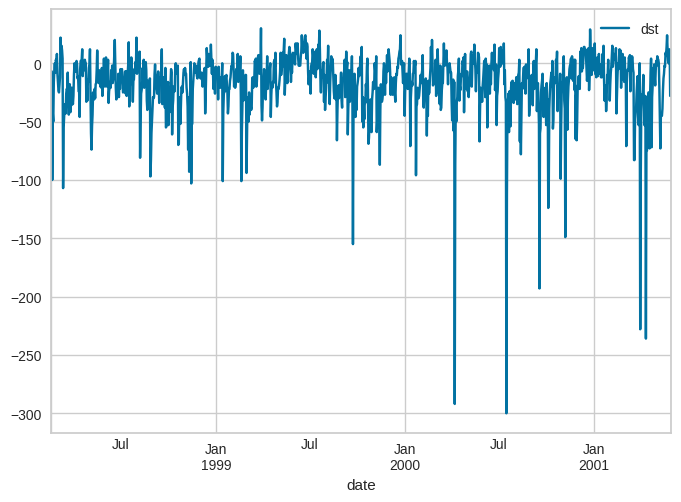

In [15]:
df_a.plot()

Inicializando o ambiente de treinamento e criando o pipeline de transformações

In [16]:
setup = setup(df_a,
              fh = 3,
              session_id = 42,
              fold_strategy = 'expanding',
              # numeric_imputation_target = 'drift',
              )

,Description,Value
0,session_id,42
1,Target,dst
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1201, 1)"
5,Transformed data shape,"(1201, 1)"
6,Transformed train set shape,"(1198, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


Treinando e avaliando modelos com validação cruzada

In [18]:
best = compare_models()

,Model,MASE,RMSSE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,0.4240,0.3123,9.8635,1026150971274578.5000,1.3952,-3.6992,0.0600
arima,ARIMA,0.4287,0.2847,8.9917,3444560969375406.5000,1.3400,-5.0293,0.2833
snaive,Seasonal Naive Forecaster,0.4373,0.3110,9.8222,5504399544563940.0000,1.2446,-6.1179,0.1500
naive,Naive Forecaster,0.4488,0.3009,9.5042,1000799917193444.5000,1.3735,-6.6602,2.4200
stlf,STLF,0.4861,0.3498,11.0462,6191891434141783.0000,1.2485,-7.9643,0.1433
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.4870,0.3473,10.9705,1008665446974047.0000,1.5870,-6.2268,0.2600
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.5784,0.4056,12.8103,945829431708424.6250,1.8594,-8.4040,2.0100
exp_smooth,Exponential Smoothing,0.5796,0.3812,12.0415,4517499562746209.0000,1.3039,-14.0803,0.4300
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.5875,0.4339,13.7007,416497177228897.2500,1.6009,-12.7937,0.1967
ets,ETS,0.6459,0.4271,13.4924,3724682186636982.5000,1.3669,-19.3295,0.2800


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

Criando modelo selecionado

In [28]:
best_model = create_model('arima',
                          fold=5)

,cutoff,MASE,RMSSE,RMSE,MAPE,SMAPE,R2
0,2001-05-13,1.0081,0.7039,22.2922,1.1657,0.6218,-3.3338
1,2001-05-16,0.5864,0.3674,11.6275,3.6680,1.1759,-13.1486
2,2001-05-19,0.5922,0.3696,11.6823,1.1797,2.0000,-14.7471
3,2001-05-22,0.4375,0.3187,10.0622,1.3354,0.8214,-0.2414
4,2001-05-25,0.2564,0.1658,5.2306,10333682908126218.0000,1.1985,-0.0993
Mean,NaT,0.5761,0.3851,12.1789,2066736581625245.2500,1.1635,-6.3141
SD,NaT,0.2484,0.1759,5.5783,4133473163250486.5000,0.4715,6.3594


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Otimizando hiperparametros

In [30]:
tuned_model, tuner = tune_model(best_model,
                                return_tuner=True,
                                search_algorithm = "grid",
                                # search_algorithm = "random",
                                optimize="RMSE",
                                )
tuned_model

,cutoff,MASE,RMSSE,RMSE,MAPE,SMAPE,R2
0,2001-05-19,0.5505,0.3482,11.0073,1.0718,2.0000,-12.9801
1,2001-05-22,0.4243,0.3357,10.5991,0.5250,0.7700,-0.3775
2,2001-05-25,0.3239,0.2575,8.1236,170285066267104.8438,2.0000,-1.6515
Mean,NaT,0.4329,0.3138,9.9100,56761688755702.1484,1.5900,-5.0030
SD,NaT,0.0927,0.0401,1.2741,80273150061513.2500,0.5798,5.6646


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    5.8s finished


ARIMA(seasonal_order=(0, 1, 0, 2))

Visualizando predição

In [34]:
plot_model(tuned_model, plot = 'forecast')

Visualizando residuos

In [35]:
plot_model(tuned_model, plot = 'residuals')

Realizando predições

In [36]:
pred = predict_model(best, fh = 10)
pred

,y_pred
2001-05-29,2.3359
2001-05-30,2.3359
2001-05-31,2.3359
2001-06-01,2.3359
2001-06-02,2.3359
2001-06-03,2.3359
2001-06-04,2.3359
2001-06-05,2.3359
2001-06-06,2.3359
2001-06-07,2.3359


Obtendo resultados da predição

In [37]:
pred.head()

,y_pred
2001-05-29,2.3359
2001-05-30,2.3359
2001-05-31,2.3359
2001-06-01,2.3359
2001-06-02,2.3359


Salvando pipeline do modelo

In [38]:
save_model(best, 'ts_pred_pipeline')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 Croston())]))]),
 'ts_pred_pipeline.pkl')

Carregando pipeline do modelo

In [39]:
loaded_best_pipeline = load_model('ts_pred_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                Croston())]))])